# Predicting Iris Species Based on Key Properties

# Introduction

For this project, we will explore whether we can predict which of three species an iris is using measurements of the plant’s flower, and which measurements are the strongest predictors of species. I will be attempting to answer the question, “Can an Iris plant be classified using measurements of its flower?” We will use a dataset called “Iris Species” with 150 different measurements of iris flowers. It includes length and width measurements of both the sepal and petal, and each flower was classified as either iris setosa, iris versicolor, or iris virginica. There are 50 observations of each class. 

The dataset on irises was downloaded from https://www.kaggle.com/datasets/uciml/iris into a csv file and put into a Google Drive link. Then, we downloaded the file using the URL and read it into R with the read_csv function. Our data was also already tidy, so no wrangling was necessary to clean it. 

In [1]:
library(tidyverse)
library(tidymodels)
library(infer)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
URL <- "https://drive.usercontent.google.com/u/0/uc?id=1nJhPS7V3n2RzNWZOMhgunLFikY5035Vv&export=download"
download.file(URL, "data/iris.csv")
iris <- read_csv("data/iris.csv") |>
    select(-Id) |>
    mutate(Species = as_factor(Species))
iris

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


Considering that 'Id' is an irrelevant variable, we removed the 'Id' column to better perform the following analysis.

# Explorary Data Analysis

I created training data by splitting the data into 3/4 for training, as shown in the table below. We generated scatter plots for all 6 unique combinations of 2 of the predictors. After generating the plots, I found that petal width and length seem to be the most effective predictors of an iris species due to its clear clusters for each species. I will investigate this further and compare our final results to our exploratory analysis.

In [3]:
set.seed(6666)
iris_split <- initial_split(iris, prop = .75, strata = Species)  
iris_train <- training(iris_split)   
iris_test <- testing(iris_split)

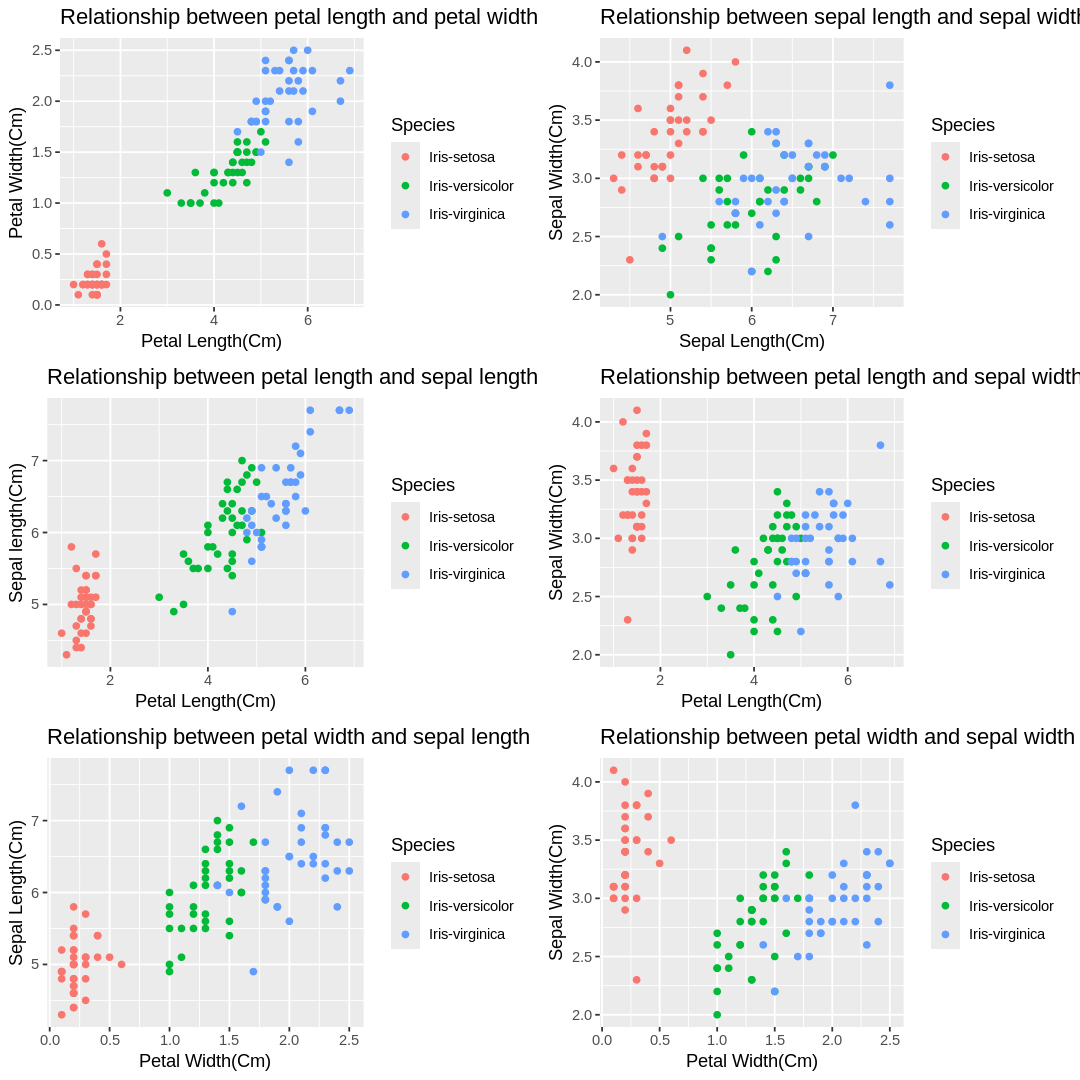

In [4]:
iris_plot <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)") +
    ggtitle("Relationship between petal length and petal width ")
iris_plot2 <- iris_train |> 
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between sepal length and sepal width ")
iris_plot3 <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = SepalLengthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Sepal length(Cm)") +
    ggtitle("Relationship between petal length and sepal length ")
iris_plot4 <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between petal length and sepal width ")
iris_plot5 <- iris_train |> 
    ggplot(aes(x = PetalWidthCm, y = SepalLengthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Width(Cm)", y = "Sepal Length(Cm)") +
    ggtitle("Relationship between petal width and sepal length ")
iris_plot6 <- iris_train |> 
    ggplot(aes(x = PetalWidthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Width(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between petal width and sepal width ")

options(repr.plot.width = 9, repr.plot.height = 9)
plot_grid(iris_plot,iris_plot2,iris_plot3,iris_plot4,iris_plot5,iris_plot6, ncol = 2)

In [ ]:
iris_train |>
    group_by(Species) |>
    summarize(SepalLengthAvg = mean(SepalLengthCm), SepalWidthAvg = mean(SepalWidthCm), PetalLengthAvg = mean(PetalLengthCm), PetalWidthAvg = mean(PetalWidthCm))

This summary of the data frame's measurements supports the fact that petal length and width would be the most effective predictors. While sepal measurements remain relatively close, with differences between species often being less than 1, petal measurements stay consistently distinct. This means that our classes will be clearly separate and classification will be more reliable. 

# Methods

I will construct several classification models using different combinations of predictors. I will then run cross-validation on our models and compare their prediction accuracy to evaluate which model is the best. I will then visualize the data in a scatter plot. First, I will investigate whether we can use all predictors combined to create an accurate classification model. Thus, I will use petal length, petal width, sepal length, and sepal width as predictors.

***Expected Outcome and Significance***

With our classification models, I expect a prediction of a setosa iris given a lower petal width and length, a versicolor iris given a medium petal width and length, and a virginica iris given a high petal width and length. I expect the model to be effective at identifying iris species because our exploratory analysis showed distinct clusters. This model is expected to be good at identifying iris species from the wild. This classification process could be expanded to other species or more measurements could be used as predictors. 

# Classification Analysis

First, I used a KNN classification model to tune the model and perform 5-fold cross-validation to find the optimal K value.

In [5]:
iris_vfold <- vfold_cv(iris_train, v = 5, strata = Species) 

In [6]:
iris_recipe <- recipe(Species ~., data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results <- workflow() |>
  add_recipe(iris_recipe) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- iris_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9273810,5,0.01904762,Preprocessor1_Model01
2,accuracy,multiclass,0.9273810,5,0.01904762,Preprocessor1_Model02
3,accuracy,multiclass,0.9285714,5,0.02695055,Preprocessor1_Model03
4,accuracy,multiclass,0.9285714,5,0.02695055,Preprocessor1_Model04
5,accuracy,multiclass,0.9452381,5,0.02704242,Preprocessor1_Model05
6,accuracy,multiclass,0.9452381,5,0.02704242,Preprocessor1_Model06
7,accuracy,multiclass,0.9452381,5,0.01819132,Preprocessor1_Model07
8,accuracy,multiclass,0.9452381,5,0.01819132,Preprocessor1_Model08
9,accuracy,multiclass,0.9452381,5,0.01819132,Preprocessor1_Model09


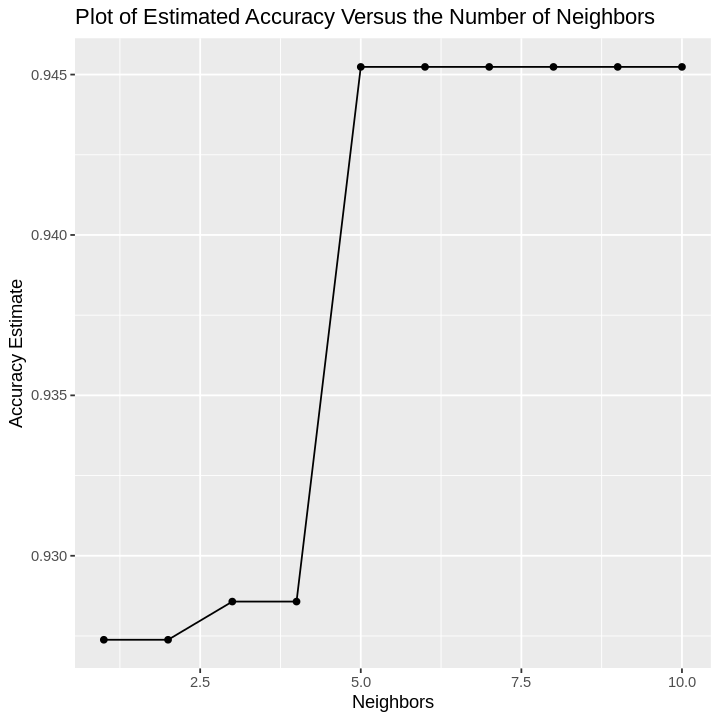

In [7]:
options(repr.plot.width = 6, repr.plot.height = 6)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Plot of Estimated Accuracy Versus the Number of Neighbors")
 accuracy_vs_k

Based on the plot above, K = 5 to K= 10 provide the highest cross-validation accuracy estimate at around 95%. I will compare this to 6 models containing only 2 predictors to evaluate which predictors are the most effective.

I expect petal width and length to be the most effective since those values showed a significant impact on the outcome in determining iris species. Sepal width showed no significant impact on determining iris species and sepal length showed a very weak relationship to species, so it will likely be less effective.

In [9]:
# Cross-validation with petal length and petal width variables
iris_recipe_PL_PW <- recipe(Species ~PetalLengthCm + PetalWidthCm, data = iris_train) |> 
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_PL_PW <- workflow() |>
  add_recipe(iris_recipe_PL_PW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_PW <- iris_results_PL_PW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_PW") 

# Cross-validation with petal length and sepal width variables
iris_recipe_PL_SL <- recipe(Species ~PetalLengthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_PL_SL <- workflow() |>
  add_recipe(iris_recipe_PL_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_SL <- iris_results_PL_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_SL") 

# Cross-validation with petal length and Sepal width variables
iris_recipe_PL_SW <- recipe(Species ~PetalLengthCm + SepalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_PL_SW <- workflow() |>
  add_recipe(iris_recipe_PL_SW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_SW <- iris_results_PL_SW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_SW") 

# Cross-validation with petal width and Sepal Length variables
iris_recipe_PW_SL <- recipe(Species ~PetalWidthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_PW_SL <- workflow() |>
  add_recipe(iris_recipe_PW_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PW_SL <- iris_results_PW_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PW_SL") 

# Cross-validation with petal width and sepal width variables
iris_recipe_PW_SW <- recipe(Species ~PetalWidthCm + SepalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_PW_SW <- workflow() |>
  add_recipe(iris_recipe_PW_SW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PW_SW <- iris_results_PW_SW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PW_SW") 

# Cross-validation with sepal width and sepal length variables
iris_recipe_SW_SL <- recipe(Species ~SepalWidthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results_SW_SL <- workflow() |>
  add_recipe(iris_recipe_SW_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_SW_SL <- iris_results_SW_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "SW_SL") 
    

# Final results of the cross-validation analysis
all_accuracies <- rbind(accuracies_PL_PW, accuracies_PL_SL, accuracies_PL_SW, accuracies_PW_SL, accuracies_PW_SW, accuracies_SW_SL)  
head(all_accuracies)
tail(all_accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config,predictors
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
1,accuracy,multiclass,0.9559524,5,0.01325658,Preprocessor1_Model01,PL_PW
2,accuracy,multiclass,0.9559524,5,0.01325658,Preprocessor1_Model02,PL_PW
3,accuracy,multiclass,0.9642857,5,0.01597191,Preprocessor1_Model03,PL_PW
4,accuracy,multiclass,0.9642857,5,0.01597191,Preprocessor1_Model04,PL_PW
5,accuracy,multiclass,0.9547619,5,0.01325658,Preprocessor1_Model05,PL_PW
6,accuracy,multiclass,0.9547619,5,0.01325658,Preprocessor1_Model06,PL_PW


neighbors,.metric,.estimator,mean,n,std_err,.config,predictors
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
5,accuracy,multiclass,0.7000000,5,0.03869505,Preprocessor1_Model05,SW_SL
6,accuracy,multiclass,0.6928571,5,0.03841938,Preprocessor1_Model06,SW_SL
7,accuracy,multiclass,0.6833333,5,0.01819132,Preprocessor1_Model07,SW_SL
8,accuracy,multiclass,0.6750000,5,0.01721051,Preprocessor1_Model08,SW_SL
9,accuracy,multiclass,0.6654762,5,0.01413612,Preprocessor1_Model09,SW_SL
10,accuracy,multiclass,0.6464286,5,0.02347986,Preprocessor1_Model10,SW_SL


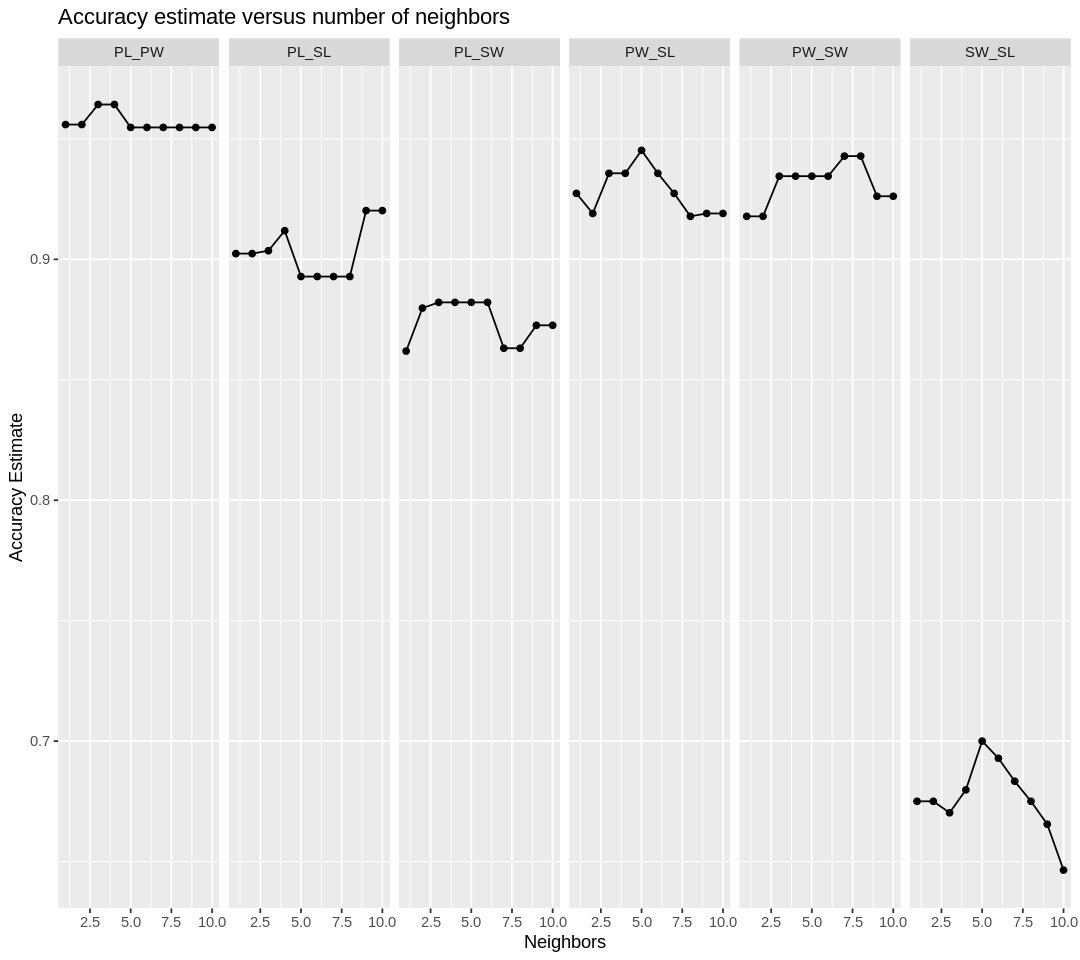

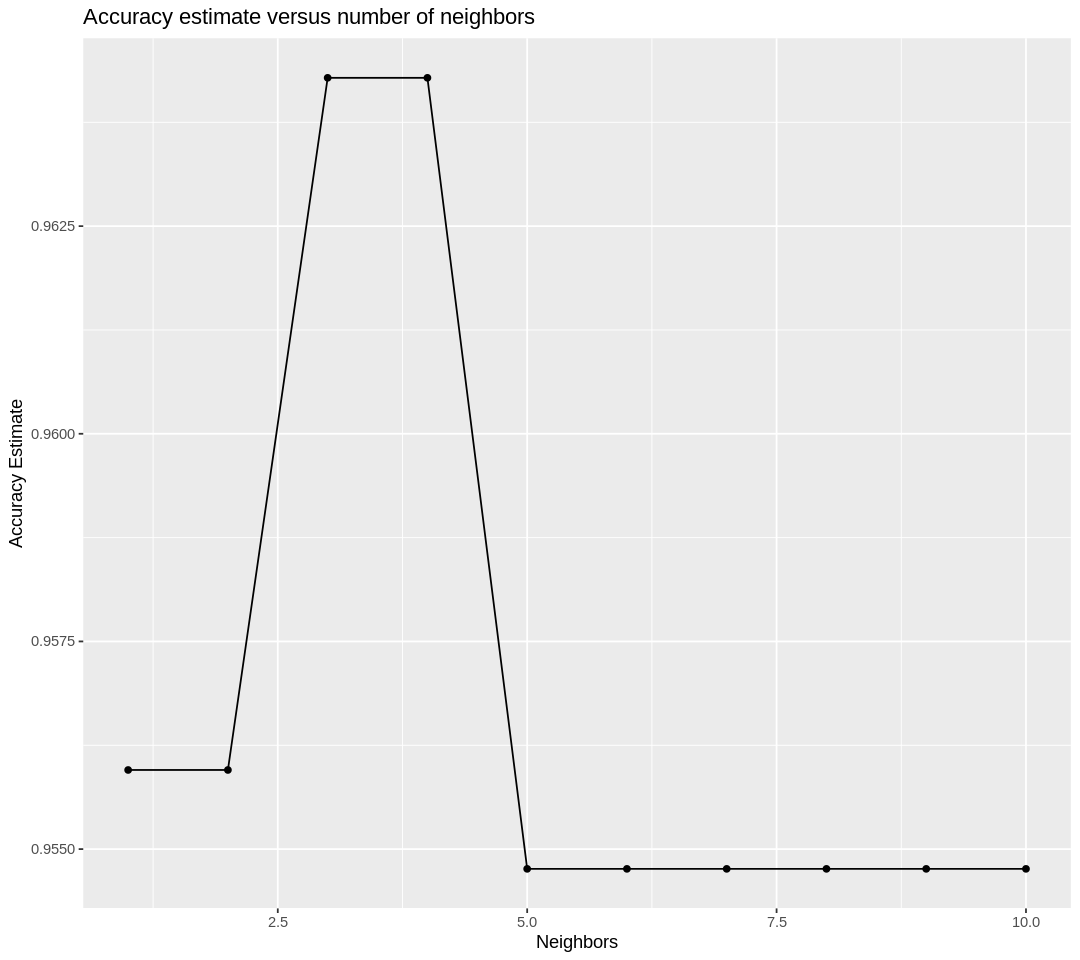

In [10]:
options(repr.plot.width = 9, repr.plot.height = 8)
all_accuracies_vs_k <- ggplot(all_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    facet_grid(cols = vars(predictors)) +
    ggtitle("Accuracy estimate versus number of neighbors")
 all_accuracies_vs_k


PL_PW_vs_k <- ggplot(accuracies_PL_PW, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy estimate versus number of neighbors")
PL_PW_vs_k

Above are the graphs of all 6 cross-validations and an expanded version of the first graph. These graphs reveal that how we choose predictors drastically affects the accuracy of the model. First, the leftmost PW_PL model had a maximum accuracy of around 96.5%. The next 4 graphs have one petal measurement and one sepal measurement. The accuracy remains comparable, with maximums between 95% and 87%. As expected, the graph using both sepal measurements has a significantly lower maximum accuracy of 70%. This suggests that the strongest predictor choice is petal length and petal width, and the best k value is k = 4. This choice yielded the highest accuracy of any cross-validation. It is important to note that the model with only petal measurements achieved a higher accuracy than the all-predictors model. This reveals that using ineffective predictors can have a detrimental effect on the classification model.

In [11]:
iris_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

iris_fit_final <- workflow() |>
  add_recipe(iris_recipe_PL_PW) |>
  add_model(iris_spec_final) |>
  fit(data = iris_train)

In [13]:
# Predictions on the test data
iris_predictions <- predict(iris_fit_final, iris_test) |>
  bind_cols(iris_test) 
iris_predictions
iris_predictions |>
  metrics(truth = Species, estimate = .pred_class) |>
  filter(.metric == "accuracy") 

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,5.1,3.5,1.4,0.2,Iris-setosa
Iris-setosa,4.9,3.0,1.4,0.2,Iris-setosa
Iris-setosa,4.6,3.4,1.4,0.3,Iris-setosa
Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa
Iris-setosa,5.4,3.9,1.3,0.4,Iris-setosa
Iris-setosa,4.8,3.4,1.9,0.2,Iris-setosa
Iris-setosa,5.0,3.4,1.6,0.4,Iris-setosa
Iris-setosa,5.5,4.2,1.4,0.2,Iris-setosa
Iris-setosa,4.4,3.0,1.3,0.2,Iris-setosa


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.974359


In [14]:
# Evaluating the predictions using confusion matrix
iris_cm <- iris_predictions |>
    conf_mat(truth = Species, estimate = .pred_class)
iris_cm
precision(iris_predictions, truth = Species, estimate = .pred_class)
recall(iris_predictions, truth = Species, estimate = .pred_class)

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              13               0              0
  Iris-versicolor           0              13              1
  Iris-virginica            0               0             12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.9761905


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.974359


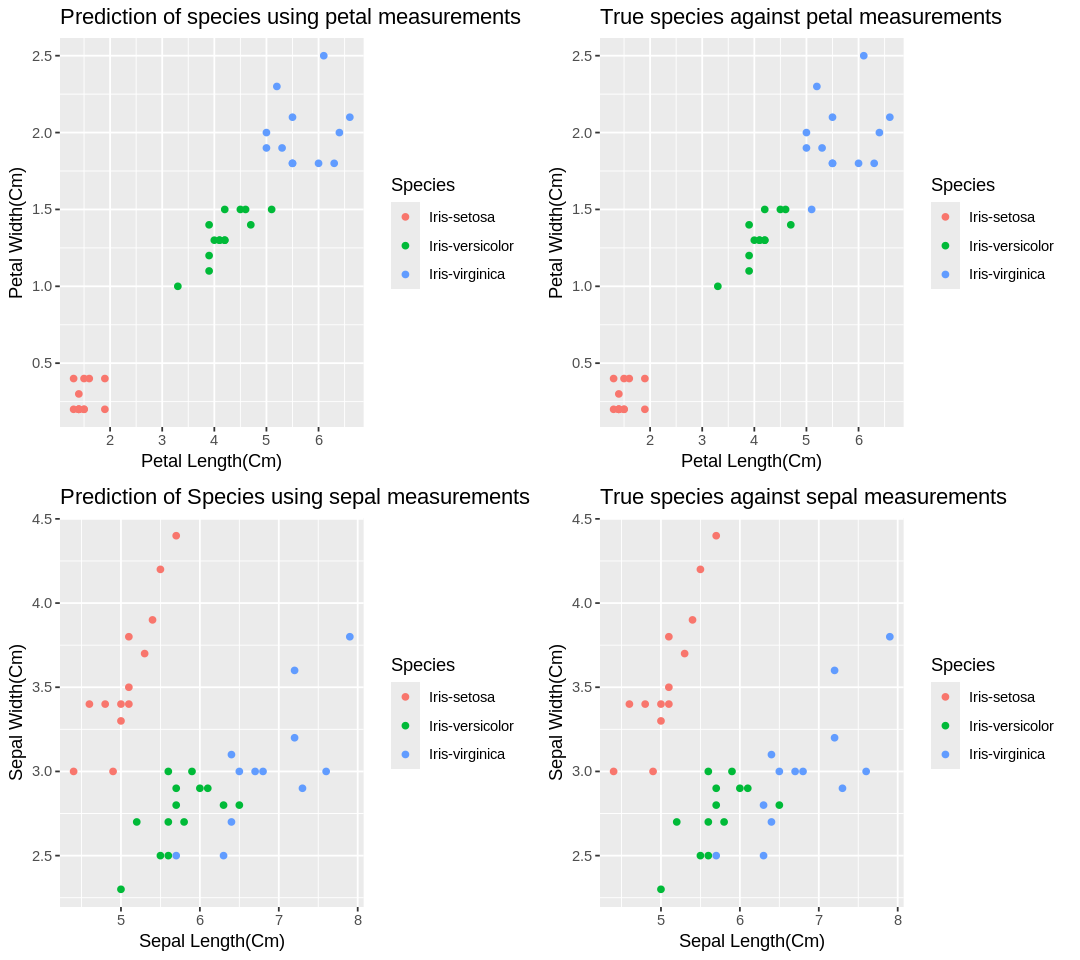

In [15]:
# Comparing the predicted results and the actual results

iris_prediction_viz1 <- iris_predictions |>
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = .pred_class)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)", color = "Species") +
    ggtitle("Prediction of species using petal measurements")
iris_actual_viz1 <- iris_predictions |>
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)") +
    ggtitle("True species against petal measurements")
iris_prediction_viz2 <- iris_predictions |>
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = .pred_class)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)", color = "Species") +
    ggtitle("Prediction of Species using sepal measurements")
iris_actual_viz2 <- iris_predictions |>
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)", color = "Species") +
    ggtitle("True species against sepal measurements")
options(repr.plot.width = 9, repr.plot.height = 8)
plot_grid(iris_prediction_viz1, iris_actual_viz1, iris_prediction_viz2, iris_actual_viz2, ncol = 2)

The scatter plots indicate a positive relationship between petal length and petal width. Conversely, there is no discernible relationship between sepal length and sepal width. Additionally, the plots demonstrate that the predictive model did a very good job in predicting the flower species. 

In [ ]:
# Building a model using only petals as predictors 
iris_recipe2 <- recipe(Species ~PetalLengthCm, PetalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

iris_results2 <- workflow() |>
  add_recipe(iris_recipe2) |>
  add_model(iris_spec2) |>
  fit(iris_train) 

iris_predicted <- predict(iris_results2, iris_test) |>
    bind_cols(iris_test)

acc1 <- iris_predicted |>
  metrics(truth = Species, estimate = .pred_class) |>
  filter(.metric == "accuracy") 

# Building a model using only sepals as predictors 
iris_recipe3 <- recipe(Species ~SepalLengthCm, SepalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_results3 <- workflow() |>
  add_recipe(iris_recipe3) |>
  add_model(iris_spec2) |>
  fit(iris_train) 

iris_predicted2 <- predict(iris_results3, iris_test) |>
    bind_cols(iris_test)

acc2 <- iris_predicted2 |>
  metrics(truth = Species, estimate = .pred_class) |>
  filter(.metric == "accuracy") 


acc1
acc2

The analysis above shows that the model using only petals as predictors achieved an accuracy of 100%, whereas the model using sepals only resulted in an accuracy of 79.5%. Consequently, we conclude that constructing the classification model using only petal length and width variables could improve the accuracy of our predictions.

# Discussion

After building a classification model using predictors such as petal length, petal width, sepal length, and sepal width, I found that the most effective variables for predicting flower species are petal length and petal width. Sepal length and width, on the other hand, may be less optimal for this purpose. Petal length and width are positively correlated, suggesting that these two features together can effectively differentiate between different iris species. Specifically, a setosa iris exhibits lower petal width and length, a versicolor iris displays medium petal width and length, and a virginica iris showcases higher petal width and length. 

During testing, the model achieved 97 percent accuracy. Although the success of the model aligned with our expectations, the accuracy was astonishingly high. This might be due to the small size of our data set, which likely makes my analysis less accurate and difficult to reproduce. Additionally, since my test dataset was even smaller, small nuances in things like the seed and choice of k could make disproportionate differences in the accuracy and confusion matrix. 

These findings can lead to improved classification accuracy by focusing on key predictors, thereby enhancing the reliability and accuracy of iris species identification. In addition, streamlining feature selection to petal characteristics can simplify model complexity and reduce training time, making the classification process more efficient. Moreover, these findings reinforce existing knowledge about iris species characteristics, offering deeper insights into the distinguishing features of each species. Apart from that, they can be applied in various fields such as botany, agriculture, and environmental studies, where accurate identification of iris species is essential.

The analysis could also lead to some future questions:
- Can we enhance the predictive power of the model by incorporating additional features or feature transformations based on petal and sepal characteristics?
- How do environmental factors or geographic variations influence the physical attributes of iris species, and can these factors be incorporated into the model for improved classification?
- How do petal length and width contribute more significantly to flower species classification compared to sepal length and width? Are there specific biological reasons for this distinction?

# References

- Fisher, R. A. (1936). Iris Species. Www.kaggle.com. https://www.kaggle.com/datasets/uciml/iris
- Rose, Michael & Christian, Wagner & Philip, Frederick. (2011). Evidence Feed Forward Hidden Markov Model: A New Type Of Hidden Markov Model. International Journal of Artificial Intelligence & Applications. 2. 